# Utilities

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import sklearn 
from skimage import transform
from skimage.transform import rotate, AffineTransform,warp
from skimage.util import random_noise
from skimage import util
from skimage.filters import gaussian
from sklearn import preprocessing



import cv2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
def showImage(image):
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

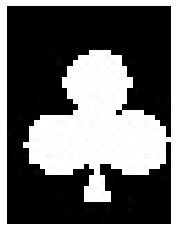

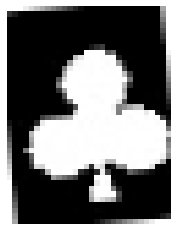

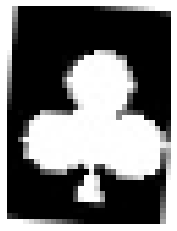

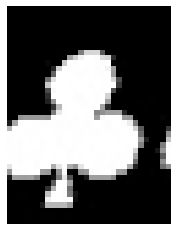

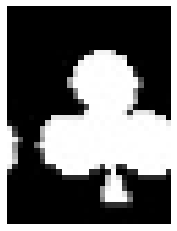

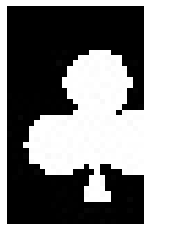

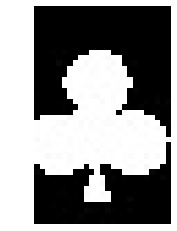

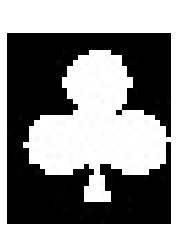

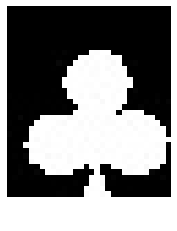

In [ ]:

image = cv2.imread("DataSet/trainData/club/2C0.jpg", cv2.COLOR_BGR2GRAY)
showImage(image)

img = image

image = rotate(img, angle=5); 
showImage(image)
image = rotate(img, angle=-5); 
showImage(image)
image = transform.warp(img, AffineTransform(shear=-0.2), order=1, preserve_range=True, mode='wrap');
showImage(image)
image = transform.warp(img, AffineTransform(shear=0.1), order=1, preserve_range=True, mode='wrap'); 
showImage(image)
#----------------------------------------------------------------
image = img.copy();
image[:, 25:] = 0
showImage(image)

image = img.copy();
image[:, 0:5] = 0
showImage(image)

image = img.copy();
image[0:5,:] = 0
showImage(image)

image = img.copy();
image[35:, :] = 0
showImage(image)


In [ ]:
# Image Augmentation, referncee: https://www.codespeedy.com/image-augmentation-using-skimage-in-python/

def augmentImage(img):
    augmentedImages=[img.flatten()]
    # rotation
    image = rotate(img, angle=5); augmentedImages.append(image.flatten())
    image = rotate(img, angle=-5); augmentedImages.append(image.flatten())
    # Shearing
    image = transform.warp(img, AffineTransform(shear=-0.2), order=1, preserve_range=True, mode='wrap'); augmentedImages.append(image.flatten())
    image = transform.warp(img, AffineTransform(shear=0.1), order=1, preserve_range=True, mode='wrap'); augmentedImages.append(image.flatten())
    # Cropping
    image = img.copy(); image[:, 23:] = 0; augmentedImages.append(image.flatten())
    image = img.copy(); image[:, 0:7] = 0; augmentedImages.append(image.flatten())
    image = img.copy(); image[0:7,:] = 0; augmentedImages.append(image.flatten())
    image = img.copy(); image[33:, :] = 0; augmentedImages.append(image.flatten())
    
    return augmentedImages
    
    


# Import and split the data

In [ ]:
import os
trainData = []
trainLabels = []

dire="DataSet/trainData" 

print(os.listdir(dire))

numClassesWithLimit = 0
LIMIT = 1150 # to have the same number of items in all classes
for innerDir in os.listdir(dire):
    count = 0
    for filename in os.listdir(dire+'/' +innerDir):
        # read image
        image = cv2.imread(dire+'/' + innerDir +'/' +filename, cv2.COLOR_BGR2GRAY)/255.0

        # augmentImage
        augmentedImages = augmentImage(image)
        tempLabel = [innerDir] * len(augmentedImages)
        count +=  len(augmentedImages)

        # append images
        trainData+=augmentedImages
        trainLabels+=tempLabel

        # to break the inner loop if the number of items in the class exceeded the LIMIT
        if (count >= LIMIT):
            numClassesWithLimit+=1
            print("Class", innerDir , "has", count, "items")
            break

print("Number of classes that have exceeded", LIMIT, "items is:", numClassesWithLimit, "out of", len(os.listdir(dire)))
print("trainData Size:", len(trainData), "and trainLabels size:", len(trainLabels))



['10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'club', 'diamond', 'heart', 'J', 'K', 'Q', 'spade']
Class 10 has 1152 items
Class 2 has 1152 items
Class 3 has 1152 items
Class 4 has 1152 items
Class 6 has 1152 items
Class 7 has 1152 items
Class 8 has 1152 items
Class 9 has 1152 items
Class A has 1152 items
Class club has 1152 items
Class diamond has 1152 items
Class heart has 1152 items
Class J has 1152 items
Class K has 1152 items
Class Q has 1152 items
Class spade has 1152 items
Number of classes that have exceeded 1150 items is: 16 out of 17
trainData Size: 19287 and trainLabels size: 19287


In [ ]:
from sklearn.model_selection import train_test_split

# split the data
trainData, testData, trainLabels, testLabels = train_test_split(trainData, trainLabels, test_size = 0.1 , random_state=50)


# Data Augmentation

In [ ]:
#  provides a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1:
quantile_transformer = sklearn.preprocessing.QuantileTransformer(random_state=10)
X_train_trans = quantile_transformer.fit_transform(trainData)
X_test_trans = quantile_transformer.transform(testData)

In [ ]:
from sklearn.preprocessing import StandardScaler
# fit_transform() is used on the data so that we can scale the data and also learn the scaling parameters of that data.
# It is also known as data normalization.

# Why? to standardize the independent features present in the data in a fixed range. 
# If feature scaling is not done, then a machine learning algorithm tends to weigh greater values,higher 
# and consider smaller values as the lower values, regardless of the unit of the values.

scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(trainData)
trainData = scaling.transform(trainData)
testData = scaling.transform(testData)

# Trainning

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=17, weights='distance',n_jobs=-1) 
model_KNN.fit(trainData, trainLabels)



KNeighborsClassifier(n_jobs=-1, n_neighbors=17, weights='distance')

In [149]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model_SVC = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, max_iter=1e4))
model_SVC.fit(trainData, trainLabels)

In [ ]:
# Save the model

# Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score

# KNN
Labels_KNN_pred = model_KNN.predict(testData) 
print("KNN Model Accuarcy", accuracy_score(testLabels, Labels_KNN_pred)) # validate the model

KNN Model Accuarcy 0.21218795888399414


In [ ]:
from sklearn.metrics import accuracy_score

# SVM
Labels_SVM_pred = model_SVC.predict(testData) # test -predict the test trainData-
print("SVM Model Accuarcy", accuracy_score(testLabels, Labels_SVM_pred)) # validate the model

SVM Model Accuarcy 0.14317180616740088


# Save the model

In [ ]:
from joblib import dump, load
# save the model
dump(model_SVC, 'model.joblib') 

# load the model
# model = load('model.joblib')

model = model_KNN

# Random TestCase

In [ ]:
import random 

count  = 0
LIMIT = 100
for i in range(LIMIT):
    randomIndex = random.randint(0,len(testLabels))
    print("Predicted", testLabels[randomIndex], "as", model_SVC.predict([testData[randomIndex]])[0])
    if (testLabels[randomIndex] == model_SVC.predict([testData[randomIndex]])[0]):
        count += 1
print(count, "Passed out of", LIMIT)
# print("Predicted", testLabels[randomIndex], "as", model.predict([testData[randomIndex]]),
#     "With confidence", model.predict_proba([testData[randomIndex]]))


Predicted Q as 5
Predicted club as diamond
Predicted diamond as diamond
Predicted 6 as diamond
Predicted diamond as diamond
Predicted club as diamond
Predicted club as diamond
Predicted 7 as diamond
Predicted 5 as 5
Predicted 6 as diamond
Predicted 9 as 5
Predicted K as diamond
Predicted 6 as diamond
Predicted J as 5
Predicted diamond as diamond
Predicted 4 as diamond
Predicted 10 as 5
Predicted spade as diamond
Predicted Q as diamond
Predicted J as diamond
Predicted 5 as 5
Predicted 4 as diamond
Predicted K as diamond
Predicted 3 as diamond
Predicted 3 as 5
Predicted Q as 5
Predicted diamond as diamond
Predicted diamond as diamond
Predicted diamond as diamond
Predicted J as J
Predicted spade as diamond
Predicted 6 as 5
Predicted 5 as 5
Predicted 6 as 5
Predicted 5 as 5
Predicted 7 as diamond
Predicted 3 as 5
Predicted 4 as diamond
Predicted 8 as diamond
Predicted 6 as 5
Predicted heart as diamond
Predicted heart as diamond
Predicted club as diamond
Predicted K as diamond
Predicted 3 a

# Test Data

SVM: ['3']


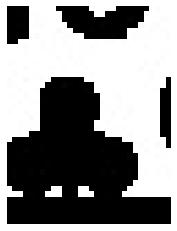

SVM: ['6']


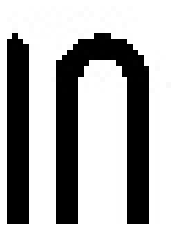

SVM: ['10']


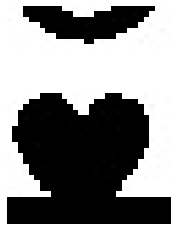

SVM: ['8']


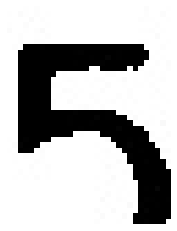

SVM: ['9']


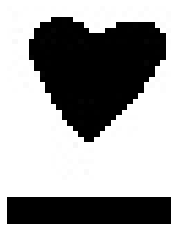

SVM: ['heart']


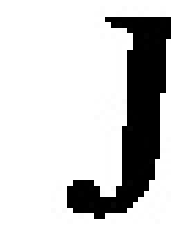

SVM: ['3']


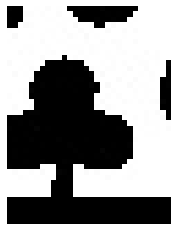

SVM: ['5']


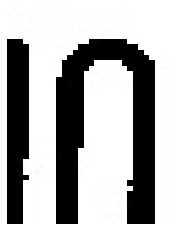

SVM: ['10']


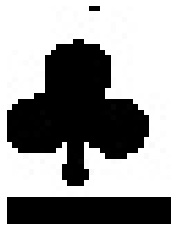

SVM: ['K']


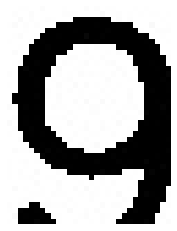

SVM: ['10']


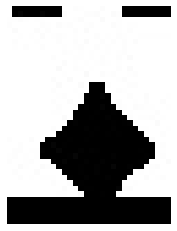

SVM: ['10']


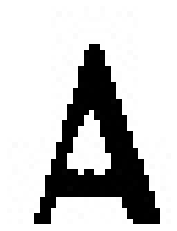

SVM: ['3']


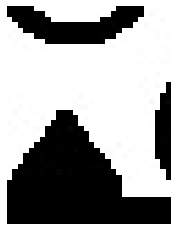

SVM: ['10']


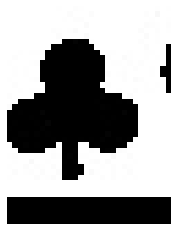

SVM: ['K']


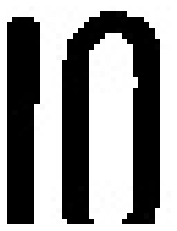

SVM: ['J']


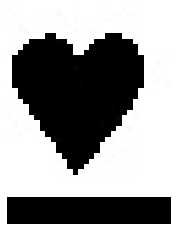

SVM: ['heart']


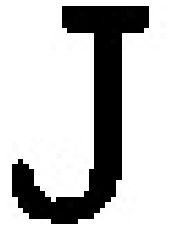

SVM: ['10']


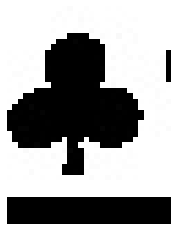

SVM: ['diamond']


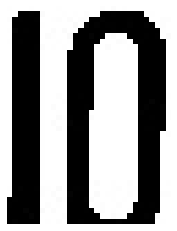

SVM: ['10']


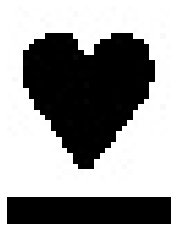

SVM: ['10']


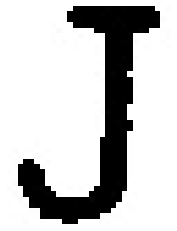

SVM: ['8']


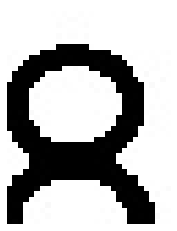

SVM: ['3']


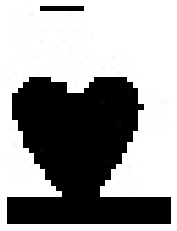

SVM: ['10']


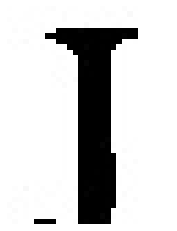

SVM: ['10']


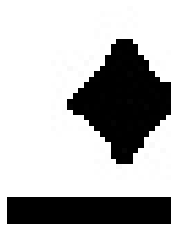

SVM: ['10']


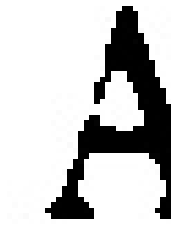

SVM: ['10']


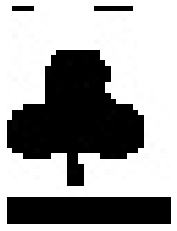

SVM: ['5']


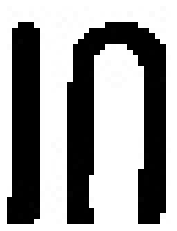

SVM: ['10']


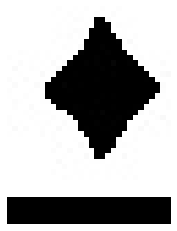

SVM: ['K']


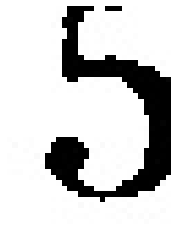

SVM: ['10']


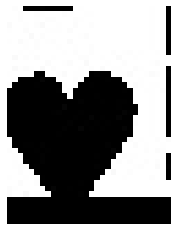

SVM: ['9']


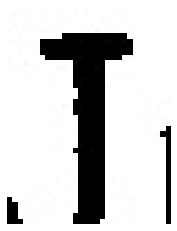

SVM: ['3']


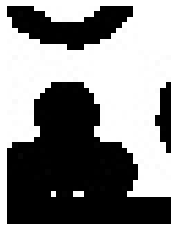

SVM: ['10']


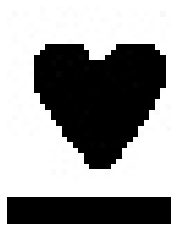

SVM: ['9']


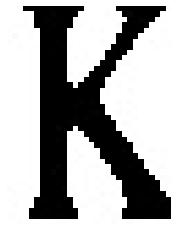

SVM: ['10']


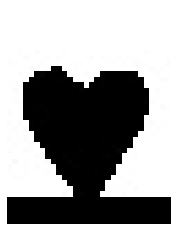

SVM: ['10']


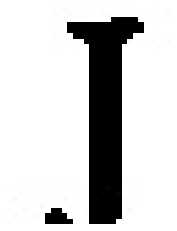

SVM: ['10']


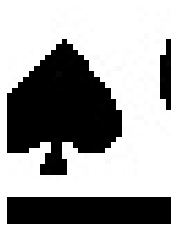

SVM: ['heart']


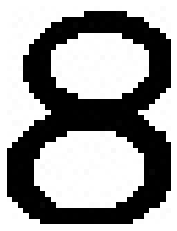

SVM: ['3']


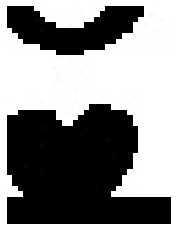

SVM: ['3']


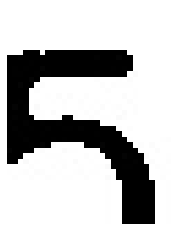

SVM: ['9']


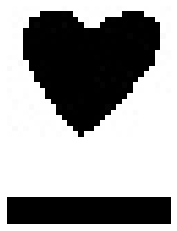

SVM: ['heart']


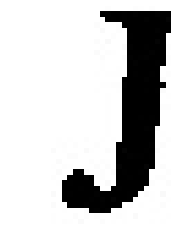

SVM: ['7']


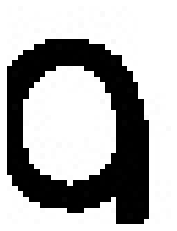

SVM: ['9']


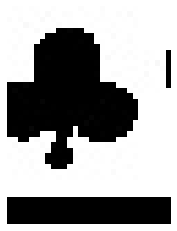

SVM: ['diamond']


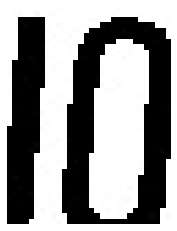

SVM: ['J']


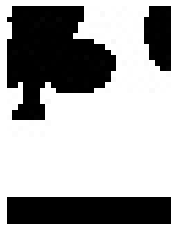

SVM: ['4']


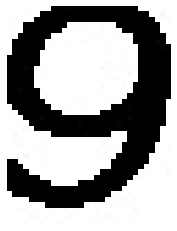

SVM: ['10']


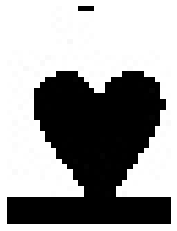

SVM: ['10']


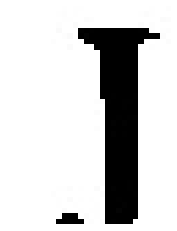

SVM: ['10']


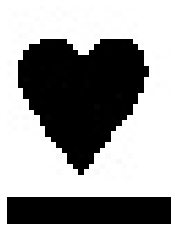

SVM: ['heart']


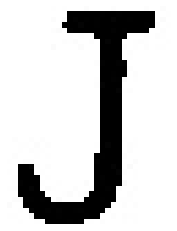

SVM: ['10']


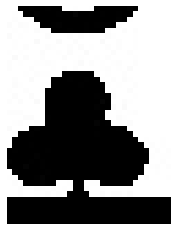

SVM: ['8']


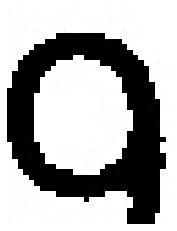

SVM: ['10']


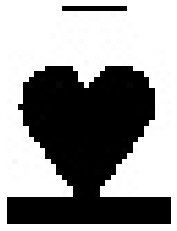

SVM: ['10']


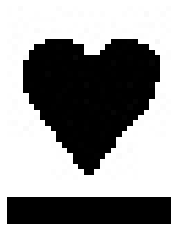

SVM: ['3']


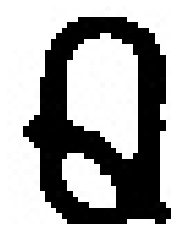

SVM: ['10']


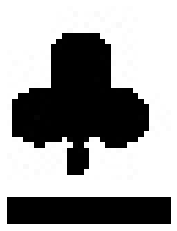

SVM: ['8']


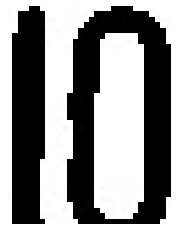

SVM: ['10']


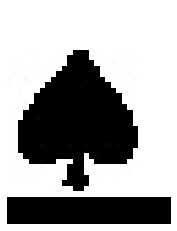

SVM: ['3']


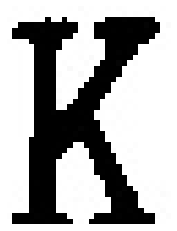

SVM: ['10']


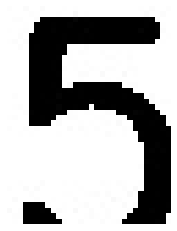

SVM: ['3']


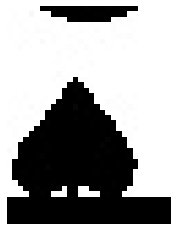

SVM: ['8']


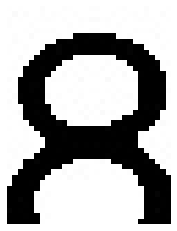

In [ ]:
import os

dire="dataSet/testData/"
for filename in os.listdir(dire):
    image = cv2.imread(dire+filename, cv2.COLOR_BGR2GRAY)/255.0
    image.resize(40, 30)
    # print("KNN:", model_KNN.predict([image.flatten()]), "SVM:", model_SVC.predict([image.flatten()]))
    # showImage(image)
    imageInverted = 1-image 
    print("SVM:", model_SVC.predict([imageInverted.flatten()]))
    showImage(imageInverted)